In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
train=pd.read_csv('../nlp-getting-started/train.csv')
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [51]:
def includes_website(text):
    website = int('http' in text)
    return website

In [52]:
def hashtags(text):
    hashtags=[]
    for word in text.split():
        if '#' in word:
            if word.count('#') == 1:
                hashtags.append(word[word.find('#')+1:])
            else:
                for subword in word[word.find('#'):].split('#')[1:]:
                    hashtags.append(subword)
    return hashtags
hashtags('this #is #test#of the#function')

['is', 'test', 'of', 'function']

In [53]:
def mentions(text):
    mentions=[]
    for word in text.split():
        if '@' in word:
            if word.count('@') == 1:
                mentions.append(word[word.find('@')+1:])
            else:
                for subword in word[word.find('@'):].split('@')[1:]:
                    mentions.append(subword)
    return mentions
mentions('What if @we mention@many@people')

['we', 'many', 'people']

In [54]:
def remove_extras(text):
    out_text=[]
    for word in text.split():
        if '#' in word:
            out_text.append(word[0:word.find('#')])
        elif '@' in word:
            out_text.append(word[0:word.find('@')])
        elif 'http' in word:
            out_text.append(word[0:word.find('http')])
        else:
            out_text.append(word)
    return ' '.join(out_text).replace('  ',' ')
remove_extras('This is#a @test ofhttp://removing extras')


'This is of extras'

In [55]:
def preprocess(data):
    data['includes_website'] = data.text.apply(lambda x: includes_website(x))
    data['hashtags'] = data.text.apply(lambda x: hashtags(x))
    data['num_hashtags'] = data.hashtags.apply(lambda  x: len(x))
    data['mentions'] = data.text.apply(lambda x: mentions(x))
    data['num_mentions'] = data.mentions.apply(lambda x:len(x))
    data['tweet_length'] = data.text.apply(lambda x: len(x))
    data['clean_text'] = data.text.apply(lambda x: remove_extras(x))
    return data

In [56]:
train=preprocess(train)
train

,id,keyword,location,text,target,includes_website,hashtags,num_hashtags,mentions,num_mentions,tweet_length,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,0,[earthquake],1,[],0,69,Our Deeds are the Reason of this May ALLAH For...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0,[],0,[],0,38,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,0,[],0,[],0,133,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,0,[wildfires],1,[],0,65,"13,000 people receive evacuation orders in Cal..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0,"[Alaska, wildfires]",2,[],0,88,Just got sent this photo from Ruby as smoke fr...
...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,1,[],0,[],0,83,Two giant cranes holding a bridge collapse int...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,0,[],0,"[aria_ahrary, TheTawniest]",2,125,The out of control wild fires in California e...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,1,[],0,[],0,65,M1.94 [01:04 UTC]?5km S of Volcano Hawaii.
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,0,[],0,[],0,137,Police investigating after an e-bike collided ...


<AxesSubplot:ylabel='target'>

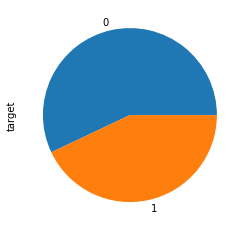

In [57]:
train.target.value_counts().plot.pie()

In [58]:
def generate_bar(data, column):
    frequency = data[column].value_counts().sort_index()
    plt.bar(frequency.keys(), frequency.values)
    plt.show()

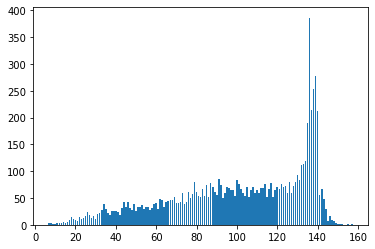

In [59]:
generate_bar(train,'tweet_length')

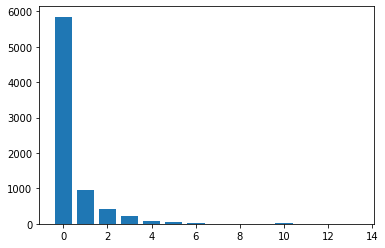

In [60]:
generate_bar(train,'num_hashtags')

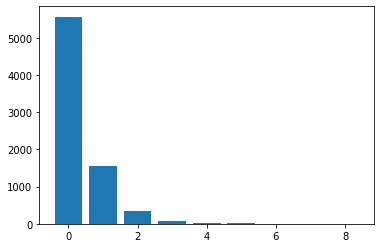

In [61]:
generate_bar(train,'num_mentions')